# <font  color=blue>Análise de Sentimento no Twitter</font>

Esse projeto consiste na Análise de sentimentos de tweets coletados através da API do Twitter sobre X. O projeto consiste em:
* Coleta de tweets.
* Identificação de tweets mais curtidos e retweetados.
* Identificação da fonte dos tweets. 
* Análise de sentimentos. 
* Nuvem de palavras mais frequentes. 
* Séries de tweets no tempo. 
* Mapa de calor dos tweets utilizando a localização declarada pelos usuários.
 

##### <font color=red>Instalação dos pacotes</font>

Antes de realizar o desafio será necessário instalar os seguintes pacotes:
* **Geopy:** Usada para definir a geolocalização<br>
*conda install -c conda-forge geopy*
* **folium**
*conda install -c conda-forge folium*
* **wordcloud:** Usada para gerar uma nuvem de palavras<br>
*conda install -c conda-forge wordcloud*
* **pandas**<br>
*conda install -c anaconda pandas*

### Importação de pacotes

In [1]:
# Pacotes básico
import tweepy #Acessa API do Twitter
import pandas as pd     
import numpy as np 
from textblob import TextBlob as tb
import time
import re

# Pacotes para visualização 
import matplotlib.pyplot as plt

# Mapa
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS

### Definição das credenciais de acesso (autenticação) na API do Twitter

In [2]:
# Credenciais para utilização da API do Twitter

consumer_key = "JYL3GsCttjpDNnDIEEMXcDkie"
consumer_secret = "HcdBcbSqKGQUhp5qaNo9xSo15IeZ4qyXtI0pls7qQpk1sdN9we"
access_token = "1275047684685148162-JBSg2LMv328OS0CimVuYIYAXlMb34t"
access_token_secret = "YWHPESluSPA3nfvX133XefMAiud6bg56vPMcaRLISm9Iy"

### Autenticação na API do Twitter

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True, retry_count = 5)

 **onde:**
 * retry_count - número padrão de tentativas para tentar quando ocorrer um erro
 * retry_delay - número de segundos para aguardar entre tentativas
 * wait_on_rate_limit - se deve ou não esperar automaticamente a reposição dos limites de taxa
 * wait_on_rate_limit_notify - Imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

### Coleta de dados (busca por palavra chave)

In [4]:
# Definir listas de armazenamento
tweets = []
info = []

# Definir que palavra deseja pesquisar no Twitter
keyword = ('home office OR homeoffice')

 **OBSERVAÇÃO:**
 A documentação completa do pacote *tweepy* está disponível no link abaixo:
 * http://docs.tweepy.org/en/v3.5.0/api.html

 Para realizar a busca por palavra chave vamos utilizar a função abaixo:<br>
 * <font color=green>API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])</font><br><br>
 **onde os principais parâmetros que serão usados são:**
 
 * <font color=blue>q</font> - a string de consulta de pesquisa
 * <font color=blue>lang</font> - Restringe os tweets para o idioma especificado, fornecido por um código ISO 639-1.
 * <font color=blue>rpp</font> - O número de tweets a serem retornados por página, até no máximo 100.
 * <font color=blue>page</font> - O número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp).
 * <font color=blue>since_id</font>  - Retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado.
 * <font color=blue>geocode</font>  - Retorna tweets de usuários localizados em um determinado raio da latitude / longitude especificada.
 * <font color=blue>show_user</font>  - Quando verdadeiro, precede "<user>:" no início do tweet. O padrão é falso. 

### Exemplo básico para busca por palavra chave e recuperar os tweets em português

 **Observação:** Antes de executar o código abaixo, faça a instalação dos pacotes conforme os comandos abaixo:
 * googletrans (https://anaconda.org/conda-forge/googletrans)<br>
 *conda install -c conda-forge googletrans*
 * unidecode (https://anaconda.org/anaconda/unidecode)<br>
 *conda install -c anaconda unidecode*

In [5]:
from googletrans import Translator
from unidecode import unidecode
import json

In [6]:
polaritiesPT = []

for tweetpt in tweepy.Cursor(api.search, q = keyword, tweet_mode = 'extended', rpp = 5, result_type = "popular", 
                             lang = "pt", include_entities = True).items(5):
    #Texto do tweet
    textPT = unidecode(tweetpt.full_text)
    print('*** Tweet em português: '+textPT)
    
    #Traduzindo para o Inglês
    textEN = Translator().translate(textPT)
    print('*** Tweet traduzido:')
    print(textEN.text)
    
    #Calculando a polaridade do texto traduzido
    polarityPT = tb(textEN.text).sentiment.polarity
    
    polaritiesPT.append(polarityPT)
    print('\n')    

*** Tweet em português: Dados de satelite confirmam: garimpeiros nao fazem home-office. Areas de "protecao" na Amazonia estao sendo invadidas e destruidas ainda mais rapidamente durante a #Covid19. Eles podem levar o coronavirus para os territorios indigenas. #EsvazieOsGarimpos https://t.co/nhsS03BLgy
*** Tweet traduzido:
Satellite data confirm: miners do not do home-office. Areas of "protection" in the Amazon are being invaded and destroyed even more quickly during # Covid19. They can take the coronavirus for indigenous territories. #EsvazieOsGarimpos https://t.co/nhsS03BLgy


*** Tweet em português: Funcionario em home office pode abdicar voluntariamente de beneficios ou parte do salario, diz presidente do Santander https://t.co/jCFhrtFnzj
*** Tweet traduzido:
Home Office employee may voluntarily relinquish the benefits or part of the salary, says president of Santander https://t.co/jCFhrtFnzj


*** Tweet em português: Nos primeiros 4 meses de 2020, 72% de todo o garimpo realizado na

In [7]:
print(polaritiesPT)

[0.41666666666666663, 0.0, 0.390625, 0.2, 0.43333333333333335]


### Buscar por palavra chave e recuperar os tweets em inglês

In [8]:
for tweet in tweepy.Cursor(api.search, q = keyword, tweet_mode = 'extended',
                           rpp = 1000, result_type = "mixed", lang = 'en',
                           include_entities = True).items(1000):
    
    if 'retweeted_status' in dir(tweet):
        aux = tweet.retweeted_status.full_text
    else:
        aux = tweet.full_text
    
    newtweet = aux.replace("\n", " ")
    
    tweets.append(newtweet)
    info.append(tweet)
    
    file = open(r"C:\Users\mbrug\Desktop\TwitterData\tweets_Keyword_homeoffice.txt", "a", -1, "utf-8")
    file.write(newtweet+'\n')
    file.close()

Para verificar a quantidade de tweets coletado use a função "len()"

In [9]:
print("Total de tweets coletados: %s."%(len(info)))

Total de tweets coletados: 1000.


Verificar a estrutura do tweet

In [10]:
status = info[0]

# Converter para string
json_str = json.dumps(status._json)

# Deserialise string para um obejto python
parsed = json.loads(json_str)

In [11]:
parsed

{'created_at': 'Fri Jun 26 00:28:17 +0000 2020',
 'id': 1276311285911691268,
 'id_str': '1276311285911691268',
 'full_text': 'Federal agents have raided the Sydney home of a NSW Labor MP amid allegations Chinese government agents infiltrated his office to influence Australian politics. | EXCLUSIVE by Nick McKenzie and Joel Tozer. https://t.co/8J56Epjt3A',
 'truncated': False,
 'display_text_range': [0, 229],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/8J56Epjt3A',
    'expanded_url': 'http://ow.ly/Zyig50Aic1L',
    'display_url': 'ow.ly/Zyig50Aic1L',
    'indices': [206, 229]}]},
 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'},
 'source': '<a href="https://www.hootsuite.com" rel="nofollow">Hootsuite Inc.</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 32201814,
  'id_str'

### Criar dataframe

In [12]:
tweets_df = pd.DataFrame(tweets, columns={'Tweets'})

tweets_df['len'] = np.array([len(tweet) for tweet in tweets])
tweets_df['ID'] = np.array([tweet.id for tweet in info])
tweets_df['USER'] = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location'] = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes'] = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets'] = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo'] = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates'] = np.array([tweet.coordinates for tweet in info])
tweets_df['Place'] = np.array([tweet.place for tweet in info])

In [13]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Federal agents have raided the Sydney home of ...,229,1276311285911691268,theage,The Age,"Melbourne, Australia",None,2020-06-26 00:28:17,Hootsuite Inc.,705,658,None,None,None
1,Australian intelligence officers and police ra...,215,1276346681521434624,AFP,AFP news agency,France,None,2020-06-26 02:48:56,Twitter Web App,702,662,None,None,None
2,LABOR MP'S HOME RAIDED AS ASIO PROBES CHINA LI...,272,1276310767281696769,PaulineHansonOz,Pauline Hanson 🇦🇺,"QLD, Australia",None,2020-06-26 00:26:14,Twitter Web App,474,215,None,None,None


In [14]:
tweets_df.to_csv(r"C:\Users\mbrug\Desktop\TwitterData\CSV\tweets_keyword_homeoffice_csv.csv")

### Identificar Top Tweets coletados

Tweets com maior número de LIKES

In [15]:
likes_max = np.max(tweets_df['Likes'])

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #Pega a posição do tweet dentro do dataframe

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes])) #Pega o texto do tweet (likes = posicao no data frame)
print("Número de curtidas: {}".format(likes_max))

O tweet com mais curtidas (likes) é: 
Federal agents have raided the Sydney home of a NSW Labor MP amid allegations Chinese government agents infiltrated his office to influence Australian politics. | EXCLUSIVE by Nick McKenzie and Joel Tozer. https://t.co/8J56Epjt3A
Número de curtidas: 705


In [16]:
# Quantos tweets tem o mesmo valor máximo de curtidas

print(np.sum(tweets_df['Likes'] == likes_max))

1


Tweets com maior número de RETWEETS

In [17]:
retweets_max = np.max(tweets_df['Retweets'])

retweet = tweets_df[tweets_df.Retweets == retweets_max].index[0] 

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet])) 
print("Número de curtidas: {}".format(retweets_max))

O tweet com mais retweet é: 
The Office: Coronavirus   Michael ignores the “work from home” memo because he thinks that everyone should be together at a time like this  Dwight acts completely normal &amp; claims genetic immunity  Angela wears a hazmat suit  Kevin says that he’s had it for weeks &amp; feels fine
Número de curtidas: 100910


In [18]:
# Quantos tweets tem o mesmo valor máximo de curtidas

print(np.sum(tweets_df['Retweets'] == retweets_max))

1


### Identifica a fonte(origem) do tweet

A fonte neste caso é o app ou dispositivo onde o usuário postou o tweet

In [19]:
sources = []

for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] +=1
            pass
        

##### Gráfico que exibe o número de tweets por fonte

In [20]:
sourceDF = pd.DataFrame({'source': percent}, index = sources)
sourceDF

,source
Hootsuite Inc.,19.0
Twitter Web App,224.0
Twitter for iPhone,358.0
Twitter for Android,247.0
Twitter for iPad,24.0
...,...
Khoros,1.0
GetAllJobs,1.0
Twitter Media Studio,1.0
LaterMedia,1.0


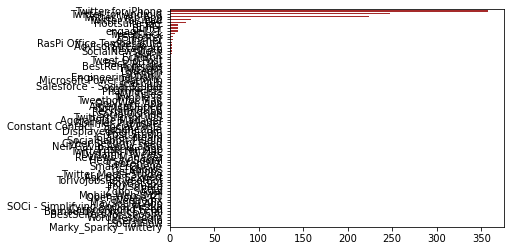

In [21]:
sources_sorted = sourceDF.sort_values('source', ascending=True) #Ordena em forma crescente pela coluna source
ax = sources_sorted.source.plot(kind="barh", color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

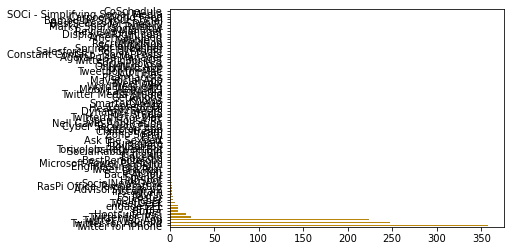

In [22]:
sources_sorted = sourceDF.sort_values('source',ascending=False) #Ordena em forma decrescente pela coluna source
ax = sources_sorted.source.plot(kind='barh',color='#B8860B')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

### Análise de polaridade:

In [23]:
# Variável que irá armazenar as polaridades
analysis = None

In [24]:
# Lista vazia para armazenar as polaridades
polarities = []

In [25]:
tweets_df.head(1)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Federal agents have raided the Sydney home of ...,229,1276311285911691268,theage,The Age,"Melbourne, Australia",None,2020-06-26 00:28:17,Hootsuite Inc.,705,658,None,None,None


In [26]:
for tweet in tweets_df['Tweets']:
    analysis = tb(tweet)
    
    polarity = analysis.sentiment.polarity # Analisa a polaridade
    
    polarities.append(polarity)

In [27]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Federal agents have raided the Sydney home of ...,229,1276311285911691268,theage,The Age,"Melbourne, Australia",None,2020-06-26 00:28:17,Hootsuite Inc.,705,658,None,None,None
1,Australian intelligence officers and police ra...,215,1276346681521434624,AFP,AFP news agency,France,None,2020-06-26 02:48:56,Twitter Web App,702,662,None,None,None
2,LABOR MP'S HOME RAIDED AS ASIO PROBES CHINA LI...,272,1276310767281696769,PaulineHansonOz,Pauline Hanson 🇦🇺,"QLD, Australia",None,2020-06-26 00:26:14,Twitter Web App,474,215,None,None,None


In [28]:
print("Vetor de polaridades: ", polarities)

Vetor de polaridades:  [0.0, -0.03333333333333333, 0.0, 0.012500000000000028, 0.2, -0.14583333333333334, 0.0, -0.05, 0.13636363636363635, 0.12083333333333332, 0.7, -0.03333333333333333, -0.03333333333333333, -0.03333333333333333, 0.0, -0.03333333333333333, 0.0, 0.0, -0.2, -0.03333333333333333, 0.0, -0.15555555555555559, -0.040740740740740744, -0.040740740740740744, 0.0, 1.0, 0.1111111111111111, 0.0, -0.2, -0.040740740740740744, -0.040740740740740744, -0.040740740740740744, 0.16666666666666666, -0.040740740740740744, -0.03750000000000001, -0.040740740740740744, 0.0, 0.0, 0.0, 0.38333333333333336, 0.0, 0.0, -0.1375, 0.0, 0.0, -0.040740740740740744, 0.4, 0.19999999999999998, -0.08143939393939394, 0.3090909090909091, -0.3333333333333333, 6.938893903907228e-18, 0.0, 0.0, 0.03571428571428571, -0.175, -0.040740740740740744, -0.05000000000000002, -0.040740740740740744, 0.0, 0.09687499999999999, -0.13125, 0.2, 0.0, 0.35714285714285715, 0.16818181818181818, -0.09333333333333334, 0.04664285714285

### Análise de Sentimentos:

In [29]:
print('Para a(s) palavra(s):"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a(s) palavra(s):"home office OR homeoffice"
A MÉDIA DE SENTIMENTO É: 0.08820133830182715


In [30]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1  

In [31]:
print("Tweets Positivos: %s" % positive)
print("Tweets Negativos: %s" % negative)
print("Tweets Neutros: %s" % neutral)

Tweets Positivos: 437
Tweets Negativos: 299
Tweets Neutros: 264


Calcula percentual

In [32]:
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [33]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

analysis_percent_df = pd.DataFrame({'Percent': percents}, index = sentiments)
analysis_percent_df


,Percent
Positivos,43.7
Negativos,29.9
Neutros,26.4


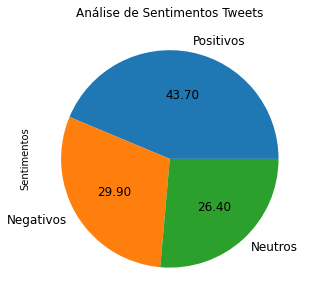

In [34]:
pie_chart = pd.Series(percents, index=sentiments, name="Sentimentos")
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5), title="Análise de Sentimentos Tweets")

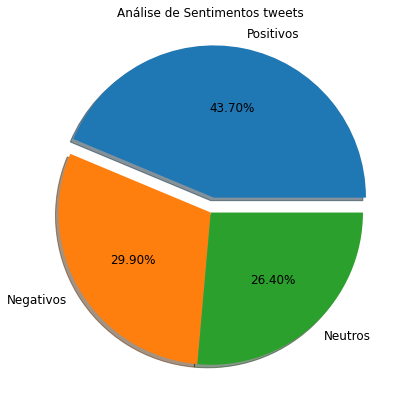

In [35]:
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',        shadow=True, startangle=90)
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True, figsize=(7, 7),title="Análise de Sentimentos tweets");

 **Dica:**
 Veja a documentação do pacote *Matplotlib* no link:
 * https://matplotlib.org/3.1.1/contents.html#

### Mapa de calor dos tweets

In [36]:
geolocator = Nominatim(user_agent = "TweeterSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

 **Dica:** Veja a documentação da função *Nominatim* no link:
 
 * https://geopy.readthedocs.io/en/stable/#nominatim

In [37]:
coordenadas = np.column_stack((latitude, longitude))

In [41]:
mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('homeoffice.html')
mapa

 **Dica:** Para conhecer o pacote Folium veja os links:
 * https://python-visualization.github.io/folium/
 * https://medium.com/@datalivre/folium-d6036a9ad29c

### Nuvem de palavras

In [44]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                       if 'https' not in word
                           and not word.startswith('@')
                           and word != 'RT'
                       ])

**OBSERVAÇÃO:**
 Antes de importar o pacote imread faça a intalação do mesmo.

In [50]:
import warnings

warnings.simplefilter('ignore')

wc = WordCloud(min_font_size = 10,
               max_font_size = 300,
               background_color = 'white',
               mode="RGB",
               width = 2000,
               height = 1000,
               normalize_plurals = True).generate(words_clean)

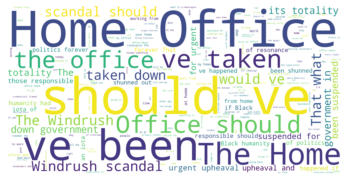

In [51]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('homeoffice_cloud.png', dpi=300)
plt.show()

**Dica:** Para conhecer o pacote WordCloud veja os links:
* https://amueller.github.io/word_cloud/index.html
* Exemplos: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

#####  Para texto em português, use o exemplo abaixo:

In [52]:
stopwords = set(STOPWORDS)

new_words = []

with open("stopwords_pt.txt") as f:
    [new_words.append(word) for line in f 
                             for word in line.split()]

FileNotFoundError: [Errno 2] No such file or directory: 'stopwords_pt.txt'

In [53]:
new_stopwords = stopwords.union(new_words)

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [54]:
warnings.simplefilter('ignore')

wc = WordCloud()

wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               stopwords=new_stopwords,
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

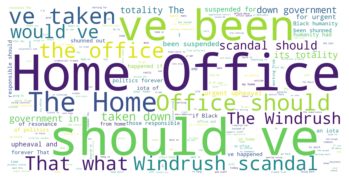

In [55]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('homeoffice_clound_pt.png', dpi=300)
plt.show()

### Análise temporal dos tweets

In [57]:
# Tweets postados por dia
data = tweets_df

In [63]:
print(data['Date'][0])

2020-06-26


In [59]:
from datetime import datetime

In [60]:
data['Date'] = pd.to_datetime(data['Date']).apply(lambda x: x.date())

print(data['Date'][0])

2020-06-26


In [61]:
x = data['Date'].value_counts() #conta a quantiade de tweets por dia
x

2020-06-25    864
2020-06-26    136
Name: Date, dtype: int64

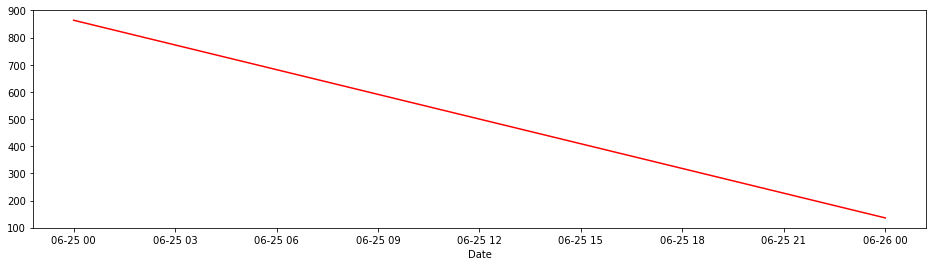

In [64]:
tlen = pd.Series(data['Date'].value_counts(), index=data['Date'])

tlen.plot(figsize=(16,4), color='r');

### Text Mining com o pacote NLTK

Para conhecer o pacote *NLTK* veja a documentação completa em:
 * https://www.nltk.org/index.html

 **Desgustação**

In [66]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweets_tokens = [] #lista para armazenar os tokens

In [67]:
for tweet in tweets_df['Tweets']:   
    print (tweet_tokenizer.tokenize(tweet))
    tweets_tokens.append(tweet_tokenizer.tokenize(tweet))

['federal', 'agents', 'have', 'raided', 'the', 'sydney', 'home', 'of', 'a', 'nsw', 'labor', 'mp', 'amid', 'allegations', 'chinese', 'government', 'agents', 'infiltrated', 'his', 'office', 'to', 'influence', 'australian', 'politics', '.', '|', 'exclusive', 'by', 'nick', 'mckenzie', 'and', 'joel', 'tozer', '.', 'https://t.co/8J56Epjt3A']
['australian', 'intelligence', 'officers', 'and', 'police', 'raid', 'the', 'home', 'and', 'office', 'of', 'an', 'opposition', 'politician', 'as', 'part', 'of', 'an', 'investigation', 'into', 'alleged', 'chinese', 'influence', 'operations', 'https://t.co/qTfr0iRg0H', 'https://t.co/gO5scwGGrD']
['labor', "mp's", 'home', 'raided', 'as', 'asio', 'probes', 'china', 'links', 'asio', 'is', 'conducting', 'a', 'sweeping', 'investigation', 'into', 'allegations', 'chinese', 'government', 'agents', 'have', 'infiltrated', 'the', 'office', 'of', 'a', 'nsw', 'labor', 'politician', 'to', 'influence', 'australian', 'politics', '.', 'https://t.co/ruoVfIT0zU']
['i', 'hones

 #### Limpar tokens

In [77]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbrug\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [78]:

from nltk.corpus import stopwords 
import string
 
punctuation = list(string.punctuation)
stopwords_english = stopwords.words('english')

In [79]:
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
                word not in string.punctuation): # remove punctuation
            tweets_clean.append(word)
 
    return tweets_clean   

In [80]:
clean_tweets_tokens = [] #lista para armazenar os tokens

In [81]:

for tweet in tweets_df['Tweets']:   
    print (clean_tweets(tweet))
    clean_tweets_tokens.append(clean_tweets(tweet))

['federal', 'agents', 'raided', 'sydney', 'home', 'nsw', 'labor', 'mp', 'amid', 'allegations', 'chinese', 'government', 'agents', 'infiltrated', 'office', 'influence', 'australian', 'politics', 'exclusive', 'nick', 'mckenzie', 'joel', 'tozer']
['australian', 'intelligence', 'officers', 'police', 'raid', 'home', 'office', 'opposition', 'politician', 'part', 'investigation', 'alleged', 'chinese', 'influence', 'operations']
['labor', "mp's", 'home', 'raided', 'asio', 'probes', 'china', 'links', 'asio', 'conducting', 'sweeping', 'investigation', 'allegations', 'chinese', 'government', 'agents', 'infiltrated', 'office', 'nsw', 'labor', 'politician', 'influence', 'australian', 'politics']
['honestly', 'believe', 'guy', 'office', 'early', 'december', 'remember', 'really', 'really', 'bad', 'cough', 'point', 'go', 'home', 'guy', 'never', 'took', 'two', 'weeks', 'length', 'virus', 'cycle', 'apparently']
['home', 'office', 'responsible', 'treatment', 'asylum', 'seekers', 'glasgow']
['big', 'stuff

['windrush', 'scandal', '’', 'taken', 'government', 'totality', 'home', 'office', '’', 'suspended', 'urgent', 'upheaval', 'responsible', '’', 'shunned', 'politics', 'forever', '’', 'would', '’', 'happened', 'black', 'humanity', 'iota', 'resonance']
['special', 'item', 'etsy', 'design', 'award', 'theetsies', 'vase', 'pottery', 'vase', 'tiger', 'art', 'office', 'decor', 'home', 'decor', 'ceramic', 'vase', 'hand', 'painted', 'porcelain']
['windrush', 'scandal', '’', 'taken', 'government', 'totality', 'home', 'office', '’', 'suspended', 'urgent', 'upheaval', 'responsible', '’', 'shunned', 'politics', 'forever', '’', 'would', '’', 'happened', 'black', 'humanity', 'iota', 'resonance']
['28c', 'office', 'home', 'outside', '28c', 'fuck', 'heat', 'american', 'friends', 'uk', 'lot', 'used', 'heat', 'yes', 'hear', 'us', 'complain', 'every', 'year', "we're", 'used', 'low', 'temps', 'rather', 'mediterranean', 'heat', 'likeliness', 'new', 'normal']
['q.astorioa', 'q.babes', 'make', 'kqw.are', 'going